<a href="https://colab.research.google.com/github/sunnypatel3/hello-workd/blob/main/Spreetail_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels
!pip install sklearn

In [2]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 1.3 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=c83637b2b2b4fdc9060eaf2fdef4ac87656851e0c839f277a226975d0f9127e8
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [3]:
# importing libraries for the excercise
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox
import io
import statsmodels.api as sm

In [4]:
#uploading and reading griven csv into colab
from google.colab import files
upload = files.upload()

Saving forecasting_interview_data.csv to forecasting_interview_data (1).csv


In [5]:
# reading csv into pandas dataframe
df = pd.read_csv(io.BytesIO(upload['forecasting_interview_data.csv']))
print(df.head())

  snapshot_date product_category  product_id       date  units
0      2/6/2022    Home & Garden           9  1/27/2019      1
1      2/6/2022    Home & Garden           9   2/3/2019      0
2      2/6/2022    Home & Garden           9  2/10/2019      0
3      2/6/2022    Home & Garden           9  2/17/2019      2
4      2/6/2022    Home & Garden           9  2/24/2019      1


In [6]:
# printing useful stats and summary
print(df.info())
print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   snapshot_date     394 non-null    object
 1   product_category  394 non-null    object
 2   product_id        394 non-null    int64 
 3   date              394 non-null    object
 4   units             394 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 15.5+ KB
None
snapshot_date       0
product_category    0
product_id          0
date                0
units               0
dtype: int64
          product_id       units
count     394.000000  394.000000
mean    90979.527919   23.720812
std     89145.329655   51.423782
min         9.000000    0.000000
25%         9.000000    1.000000
50%    108810.000000    6.000000
75%    108810.000000   20.000000
max    247174.000000  452.000000


In [7]:
# Imputation not required as there are no null or NA values
# data type conversions
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   snapshot_date     394 non-null    object        
 1   product_category  394 non-null    object        
 2   product_id        394 non-null    int64         
 3   date              394 non-null    datetime64[ns]
 4   units             394 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 15.5+ KB


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


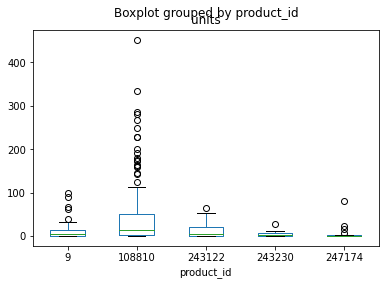

In [8]:
import seaborn as sns
df.boxplot(by = 'product_id', column = 'units', grid = False)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


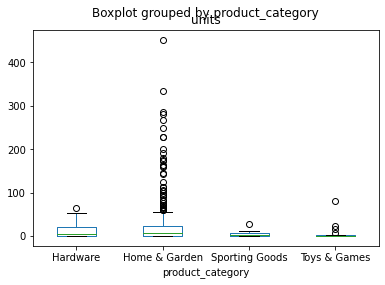

In [9]:
df.boxplot(by='product_category',column='units',grid= False)

In [10]:
df.product_id.unique()

array([     9, 108810, 243122, 243230, 247174])

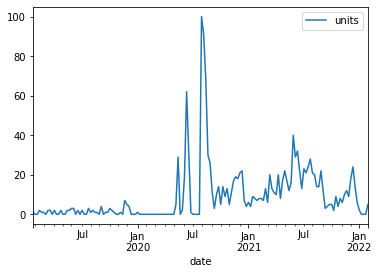

9


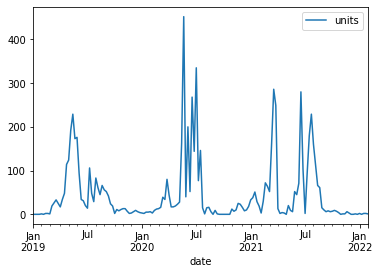

108810


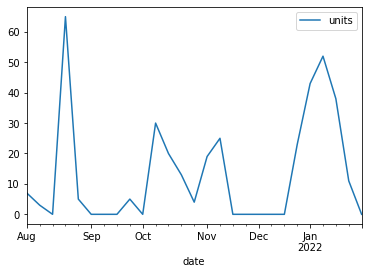

243122


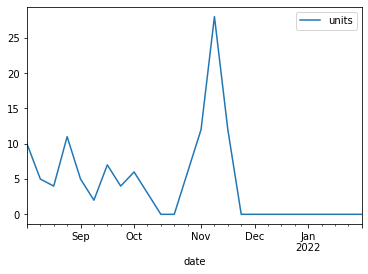

243230


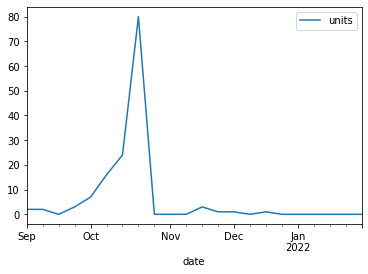

247174


In [11]:
for n in df.product_id.unique():
  p = df[df['product_id']==n]
  p[['date','units']].plot(x='date',y='units')
  plt.show()
  print(n)

In [12]:
from statsmodels.tsa.stattools import adfuller
for n in df.product_id.unique():
  p = df[df['product_id']==n]
  print(n)
  dftest = adfuller(p['units'], autolag='AIC')
  print("Test statistic = {:.3f}".format(dftest[0]))
  print("P-value = {:.3f}".format(dftest[1]))
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
  print(dftest)

9
Test statistic = -2.702
P-value = 0.074
Test Statistic                  -2.701809
p-value                          0.073726
#Lags Used                       7.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
dtype: float64
Test Statistic                  -2.701809
p-value                          0.073726
#Lags Used                       7.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
dtype: float64
Test Statistic                  -2.701809
p-value                          0.073726
#Lags Used                       7.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
Critical Value (10%)            -2.577151
dtype: float64
(-2.701808583904188, 0.07372582758684704, 7, 150, {'1%': -3.474714913481481, '5%': -2.881008708148148, '10%': -2.5771508444444446}, 1076.8186713198613)
10881

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currentl

ValueError: ignored

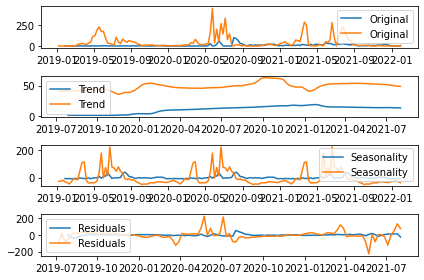

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
for n in df.product_id.unique():
  p = df[df['product_id']==n]
  p.index = p['date']
  decomposition = seasonal_decompose(p['units'])
  trend = decomposition.trend
  seasonal = decomposition.seasonal
  residual = decomposition.resid
  plt.subplot(411)
  plt.plot(p['units'], label='Original')
  plt.legend(loc='best')
  plt.subplot(412)
  plt.plot(trend, label='Trend')
  plt.legend(loc='best')
  plt.subplot(413)
  plt.plot(seasonal,label='Seasonality')
  plt.legend(loc='best')
  plt.subplot(414)
  plt.plot(residual, label='Residuals')
  plt.legend(loc='best')
  plt.tight_layout()

In [58]:
# Splitting the data set into train and test 

for n in df.product_id.unique():
  p = df[df['product_id']==n]
  p.index = p['date']
  X_train, X_test = train_test_split(p, test_size=0.3, shuffle=False)
  # X_train = p[:390]
  # X_test = p[-4:]
  print(X_train.shape)
  print(X_test.shape)
# Train and test data sets are important in statistical modeling as the model should predict well on unseen data (test). The model should not underfit or overfit (bias variance tradeoff). 
# The train and test error should have an optimal value after k-fold cross validation

(110, 5)
(48, 5)
(112, 5)
(49, 5)
(18, 5)
(9, 5)
(18, 5)
(8, 5)
(15, 5)
(7, 5)


9
108810
243122
243230


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same argumen

247174


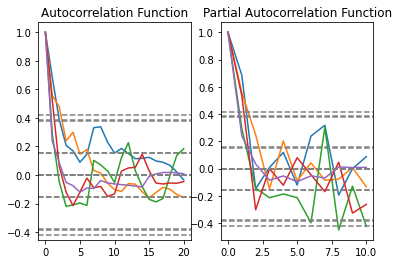

In [38]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
for n in df.product_id.unique():
  p = df[df['product_id']==n]
  p.index = p['date']
  print(n)
  lag_acf = acf(p['units'], nlags=20)
  lag_pacf = pacf(p['units'], nlags=10, method='ols')
  plt.subplot(121) 
  plt.plot(lag_acf)
  plt.axhline(y=0,linestyle='--',color='gray')
  plt.axhline(y=-1.96/np.sqrt(len(p['units'])),linestyle='--',color='gray')
  plt.axhline(y=1.96/np.sqrt(len(p['units'])),linestyle='--',color='gray')
  plt.title('Autocorrelation Function')
  plt.subplot(122)
  plt.plot(lag_pacf)
  plt.axhline(y=0,linestyle='--',color='gray')
  plt.axhline(y=-1.96/np.sqrt(len(p['units'])),linestyle='--',color='gray')
  plt.axhline(y=1.96/np.sqrt(len(p['units'])),linestyle='--',color='gray')
  plt.title('Partial Autocorrelation Function')

In [34]:
#!pip install pmdarima

     |████████████████████████████████| 1.4 MB 3.3 MB/s 
     |████████████████████████████████| 9.8 MB 36.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [39]:
from pmdarima.arima import ADFTest
for n in df.product_id.unique():
  p = df[df['product_id']==n]
  p.index = p['date']
  print(n)
  adf_t = ADFTest(alpha=0.05)
  print(adf_t.should_diff(p['units']))

9
(0.03781236323378158, False)
108810
(0.04042897943404794, False)
243122
(0.13677814431096735, True)
243230
(0.31832986061856605, True)
247174
(0.3358947887302375, True)


In [65]:
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.arima import auto_arima
for n in df.product_id.unique():
  p = X_train[X_train['product_id']==n]
  p.index = p['date']
  print(n)
  model = auto_arima(X_train['units'], start_p=0, d =1, start_q=0, max_p=5,max_d=5,max_q=5,start_P=0,D=1,start_Q=0,max_D=5,max_Q=5, m=5,seasonal=True,error_action='warn',trace=True,stepwise=True,n_fits=5)  
  #results_ARIMA = model.fit(disp=-1)
  model.summary()  
  #plt.plot(p['units'])
  #plt.plot(model.predict(n_periods=5), color='red')
  #plt.title('WMAPE: %.4f'% sum(abs(p['units']-model.predict(n_periods = 5))/sum(p['units'])))

9
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=96.989, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=inf, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(1,1,0)[5]             : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[5]             : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=79.111, Time=0.13 sec
 ARIMA(0,1,0)(2,1,1)[5]             : AIC=81.111, Time=0.15 sec
 ARIMA(0,1,0)(1,1,2)[5]             : AIC=81.111, Time=0.20 sec
 ARIMA(0,1,0)(0,1,2)[5]             : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=79.112, Time=0.16 sec
 ARIMA(0,1,0)(2,1,2)[5]             : AIC=83.111, Time=0.22 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=80.993, Time=0.29 sec
 ARIMA(0,1,1)(1,1,1)[5]             : AIC=80.968, Time=0.23 sec
 ARIMA(1,1,1)(1,1,1)[5]             : AIC=82.702, Time=0.41 sec
 ARIMA(0,1,0)(1,1,1)[5] intercept   : AIC=80.477, Time=0.18 sec

Best mode

In [89]:
print(model.predict())

[ 8.97622631 15.93422689 71.72857869 -6.96349801 -5.25993054 -5.21999545
 -2.20238637 -3.94526021 -4.29536002 -5.28333189]


9


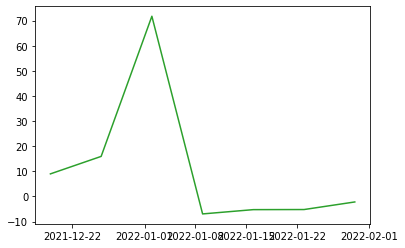

WMAPE: 2.5606
WMAPE: 115.2848
108810


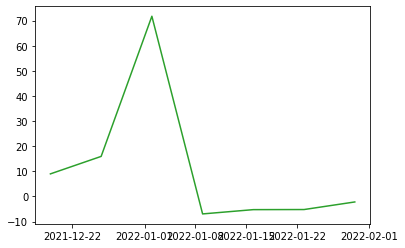

WMAPE: 2.5606
WMAPE: 115.2848
243122


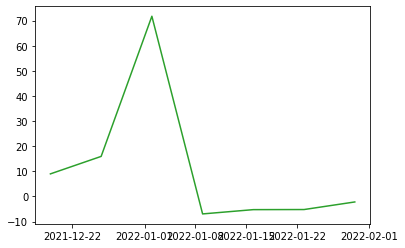

WMAPE: 2.5606
WMAPE: 115.2848
243230


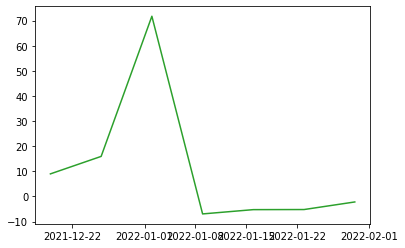

WMAPE: 2.5606
WMAPE: 115.2848
247174


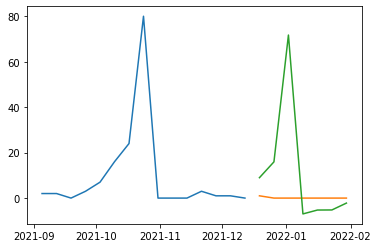

WMAPE: 2.5606
WMAPE: 115.2848


In [107]:

for n in df.product_id.unique():
  p = X_train[X_train['product_id']==n]
  p.index = p['date']
  q = X_test[X_test['product_id']==n]
  q.index = q['date']
  pred = pd.DataFrame(model.predict(n_periods=len(X_test.index)),index=X_test.index)
  pred.columns = ['prediction']
  print(n)
  plt.plot(p['units'], label="Training")
  plt.plot(q['units'], label="Test")
  plt.plot(pred, label="Prediciton")
  plt.show()
  print('WMAPE: %.4f'% sum(abs(X_train['units']-model.predict(n_periods=len(X_train.index)))/sum(X_train['units'])))
  print('WMAPE: %.4f'% sum(abs(X_test['units']-model.predict(n_periods = len(X_test.index)))/sum(X_test['units'])))